In [3]:
import pandas as pd

data = pd.read_csv('report.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Algorithm  20 non-null     object 
 1   Run        20 non-null     int64  
 2   Score      20 non-null     int64  
 3   Moves      20 non-null     int64  
 4   Time       20 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 932.0+ bytes


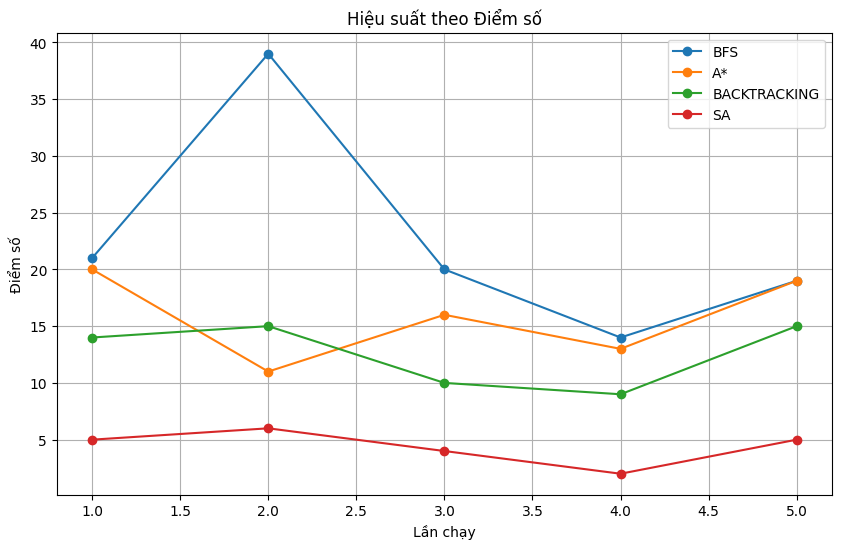

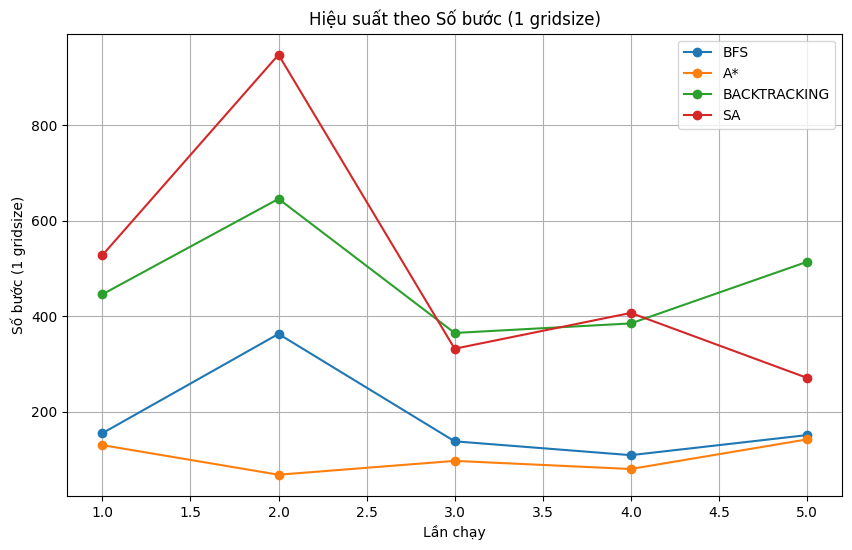

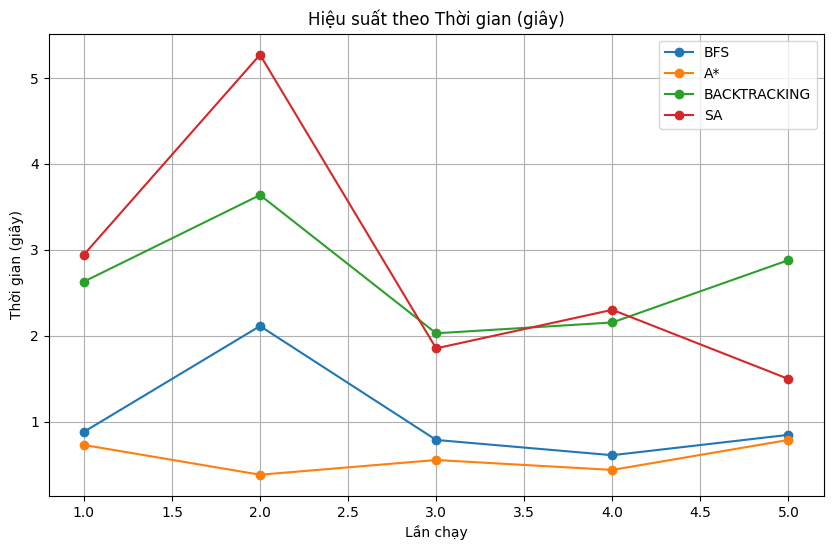

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('report.csv')

metrics = ['Score', 'Moves', 'Time']
titles = ['Điểm số', 'Số bước (1 gridsize)', 'Thời gian (giây)']

for metric, title in zip(metrics, titles):
    plt.figure(figsize=(10, 6))
    for algo in data['Algorithm'].unique():
        subset = data[data['Algorithm'] == algo]
        plt.plot(subset['Run'], subset[metric], marker='o', label=algo)
    
    plt.title(f'Hiệu suất theo {title}')
    plt.xlabel('Lần chạy')
    plt.ylabel(title)
    plt.legend()
    plt.grid(True)
    plt.show()